## About Dataset

### Data description

There are 3 types of input features:

- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.

Features:

1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code |
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

**Läs på vad de olika kolumnerna betyder. Notera att detta dataset innehåller många felaktigheter, exempelvis finns negativa blodtryck och blodtryck som är omöjligt höga.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### EDA

Använd pandas, matplotlib och seaborn för att besvara frågor för datasetet:

In [2]:
df = pd.read_csv("cardio_train.csv", sep=";", index_col=0)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [4]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df["cardio"].unique()

array([0, 1])

In [6]:
# Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?
presence_of_cardiovascular_disease = df[df["cardio"] == 1]
absence_of_cardiovascular_disease = df[df["cardio"] == 0]


In [7]:
presence_of_cardiovascular_disease.head()
print(f"{len(presence_of_cardiovascular_disease)} av totalt {len(df)} är positiva för hjärt-kärlsjukdom")

34979 av totalt 70000 är positiva för hjärt-kärlsjukdom


In [8]:
absence_of_cardiovascular_disease.head()
print(f"{len(absence_of_cardiovascular_disease)} av totalt {len(df)} är negativa för hjärt-kärlsjukdom")

35021 av totalt 70000 är negativa för hjärt-kärlsjukdom


([<matplotlib.patches.Wedge at 0x1a79c2b5c40>,
 [Text(-0.7737925838287327, 0.7818216146997049, 'Normala'),
  Text(0.44676383329807057, -1.0051875831190982, 'Över normala'),
  Text(1.0287089595771992, -0.38956113318142555, 'Långt över normala')],
 [Text(-0.4220686820883996, 0.4264481534725663, '74.8%'),
  Text(0.24368936361712937, -0.5482841362467807, '13.6%'),
  Text(0.5611139779511995, -0.2124878908262321, '11.5%')])

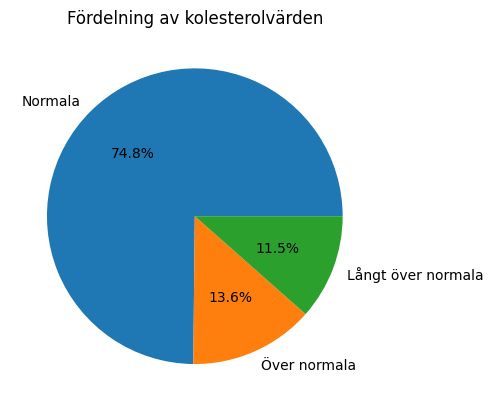

In [9]:
# Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.
# Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal 

labels = ["Normala", "Över normala", "Långt över normala"]
sizes = [len(df[df["cholesterol"] == 1]), len(df[df["cholesterol"] == 2]), len(df[df["cholesterol"] == 3])]

fig, ax = plt.subplots()
plt.title('Fördelning av kolesterolvärden')
ax.pie(sizes, labels=labels, autopct='%1.1f%%')

<Axes: >

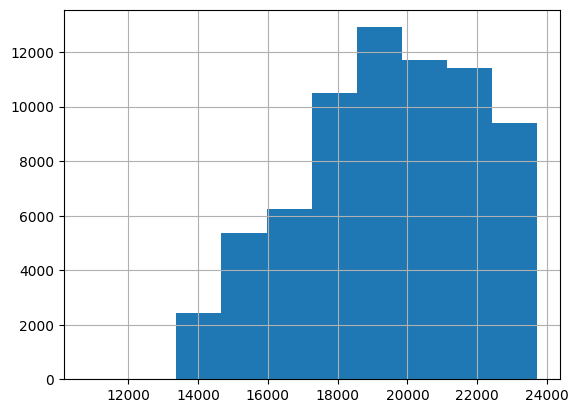

In [10]:
# Hur ser åldersfördelningen ut? Rita ett histogram.
# TODO: Labels and title
df["age"].hist()

In [11]:
# Hur stor andel röker?
smokers = df[df["smoke"] == 1]
print(f"{len(smokers)} av totalt {len(df)} röker")

6169 av totalt 70000 röker


<Axes: >

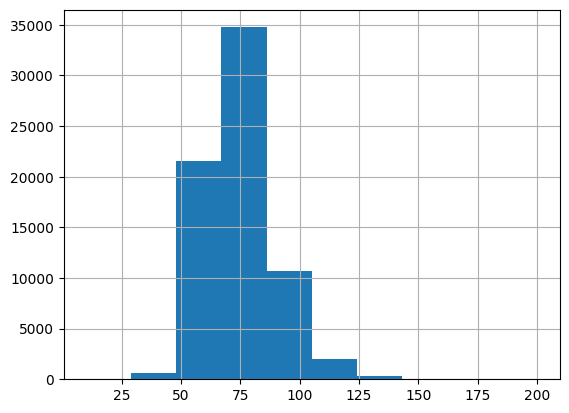

In [12]:
# Hur ser viktfördelningen ut? Rita lämpligt diagram.
# TODO: Labels and title
df["weight"].hist()

<Axes: >

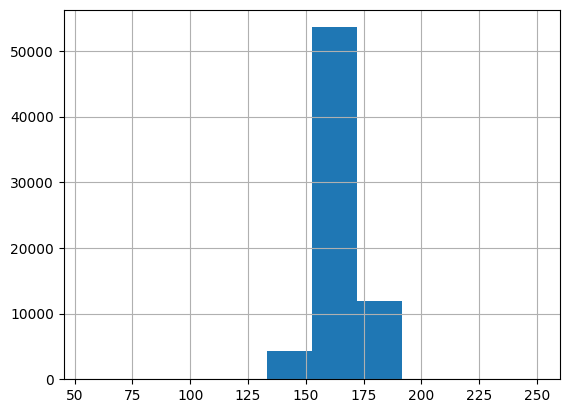

In [13]:
# Hur ser längdfördelningen ut? Rita lämpligt diagram.
# TODO: Labels and title
df["height"].hist()

heart_disease_by_gender gender
1    64.655936
2    35.344064
Name: proportion, dtype: float64


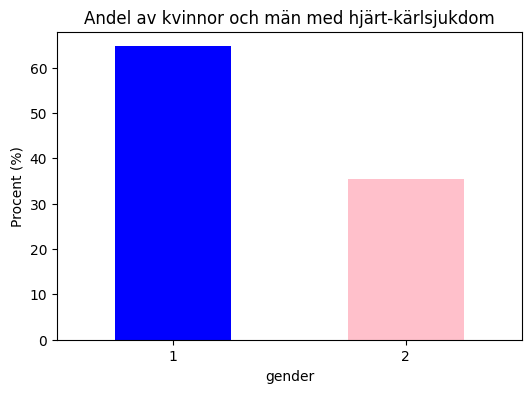

In [14]:
# Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram

# Räkna andelen med hjärt-kärlsjukdom per kön
heart_disease_by_gender = df[df["cardio"] == 1]["gender"].value_counts(normalize=True) * 100
print("heart_disease_by_gender", heart_disease_by_gender)

# Rita stapeldiagram
plt.figure(figsize=(6,4))
heart_disease_by_gender.plot(kind="bar", color=["blue", "pink"])
plt.title("Andel av kvinnor och män med hjärt-kärlsjukdom")
plt.ylabel("Procent (%)")
plt.xticks(rotation=0)
plt.show()

## Feature engineering BMI

Skapa en feature för BMI (Body Mass Index), läs på om formeln på wikipedia.

- Släng de samples med orimliga BMIer och outliers. Notera att detta kan vara svårt att avgöra i vilket range av BMIer som vi ska spara. Beskriv hur du kommer fram till gränserna.
- Skapa en kategorisk BMI-feature med kategorierna: normal range, over-weight, obese (class I), obese (class II), obese (class III).

In [15]:
def calculate_bmi(weight_in_kg, height_in_meters):
    return weight_in_kg / np.square(height_in_meters)

In [16]:
df["bmi"] =  calculate_bmi(df["weight"], df["height"] / 100)

In [17]:
df["bmi"].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: bmi, dtype: float64

<Axes: >

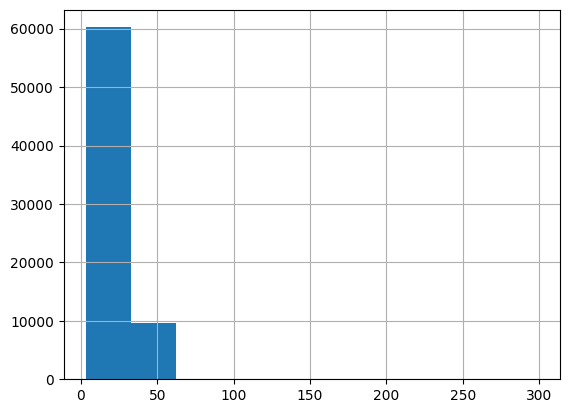

In [18]:
df["bmi"].hist()

<Axes: >

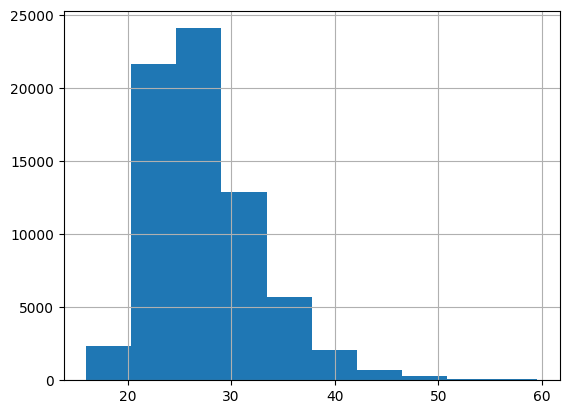

In [19]:
# The lowest recorded BMI is 10.0
# https://www.torrinomedica.it/english/dietology/bmi-dietology/what-is-the-lowest-bmi-ever-recorded/#:~:text=The%20lowest%20recorded%20BMI%20is%2010.0%2C%20observed%20in,based%20on%20their%20weight%20relative%20to%20their%20height.

# (Heigest BMI): 251.1
# https://en.wikipedia.org/wiki/List_of_heaviest_people

min_allowed_bmi = 16
max_allowed_bmi = 60

df = df.query(f'bmi > {min_allowed_bmi} and bmi < {max_allowed_bmi}')
df["bmi"].hist()

<Axes: >

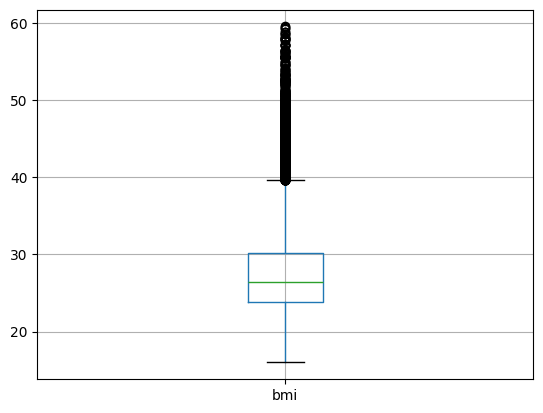

In [20]:
df.boxplot(column="bmi")

In [21]:
calculate_bmi(200, 2)

np.float64(50.0)

In [22]:
df["bmi_category"] = 1  

df.loc[(df["bmi"] >= 25.0) & (df["bmi"] < 30), "bmi_category"] = 2
df.loc[(df["bmi"] >= 30) & (df["bmi"] < 35), "bmi_category"] = 3
df.loc[(df["bmi"] >= 35) & (df["bmi"] < 40), "bmi_category"] = 4
df.loc[(df["bmi"] >= 40), "bmi_category"] = 5

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,1
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,3
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,2
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,1


### Feature engineering blodtryck
Släng bort samples med orimliga blodtryck och outliers. Likt förra uppgiften är
det inte trivialt att sätta gränserna. Skapa en feature för blodtryckskategorier
enligt tabellen i denna artikel: https://www.healthline.com/health/high-blood-
pressure-hypertensiondefinition. Beskriv hur du kommer fram till gränserna

In [23]:
df[df["ap_hi"] < 20]["ap_hi"]

id
815      14
1294     14
1360     11
2260     12
2301     14
         ..
98039    12
98213    14
98568    14
98743    12
99328    13
Name: ap_hi, Length: 182, dtype: int64

In [24]:
df["ap_hi"].describe()

count    69873.000000
mean       128.827387
std        154.147501
min       -150.000000
25%        120.000000
50%        120.000000
75%        140.000000
max      16020.000000
Name: ap_hi, dtype: float64

<Axes: >

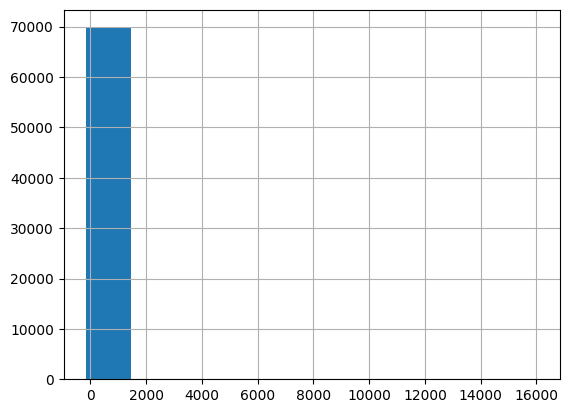

In [25]:
df["ap_hi"].hist()

In [26]:
# TODO: Förklara gränserna.
min_allowed_ap_hi = 0
max_allowed_ap_hi = 400

df = df.query(f'ap_hi > {min_allowed_ap_hi} and ap_hi < {max_allowed_ap_hi}')

<Axes: >

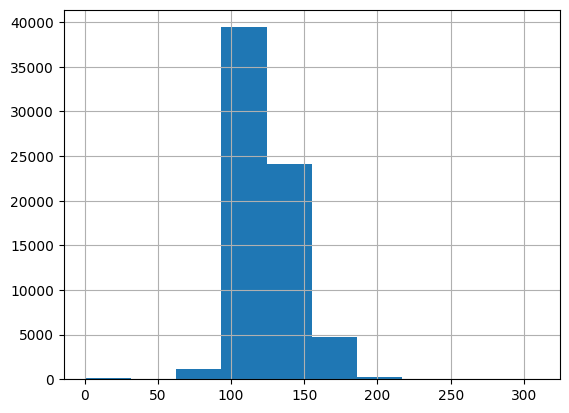

In [27]:
df["ap_hi"].hist()

<Axes: >

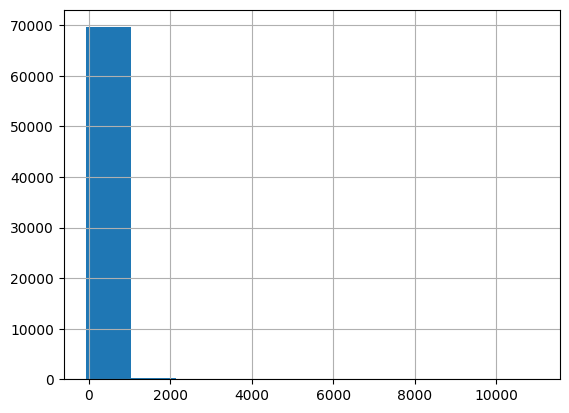

In [28]:
df["ap_lo"].hist()

In [29]:
# TODO: Förklara gränserna.
min_allowed_ap_lo = 0
max_allowed_ap_lo = 200

df = df.query(f'ap_lo > {min_allowed_ap_lo} and ap_lo < {max_allowed_ap_lo}')

<Axes: >

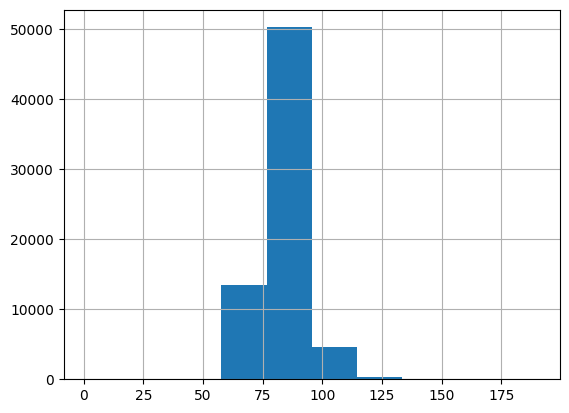

In [30]:
df["ap_lo"].hist()

### Five categories define blood pressure readings for adults:

Healthy: A healthy blood pressure reading is a systolic pressure of less than 120 millimeters of mercury (mm Hg) and a diastolic pressure of less than 80 mm Hg. This is typically written as 120/80 or spoken as “120 over 80.”

Elevated: The systolic number is between 120 and 129 mm Hg, and the diastolic number is less than 80 mm Hg. Doctors usually don’t treat elevated blood pressure with medication. Instead, they may encourage lifestyle changes to help lower your numbers.

Stage 1 hypertension: The systolic number is between 130 and 139 mm Hg, or the diastolic number is between 80 and 89 mm Hg.

Stage 2 hypertension: The systolic number is 140 mm Hg or higher, or the diastolic number is 90 mm Hg or higher.

Hypertensive crisis: The systolic number is over 180 mm Hg, or the diastolic number is over 120 mm Hg. Blood pressure in this range requires urgent medical attention. If symptoms, such as chest pain, headache, shortness of breath, or visual changes occur when blood pressure is this high, medical care in an emergency department is needed.

In [31]:
df["blood_presure_category"] = 0

df.loc[(df["ap_hi"] < 120) & (df["ap_lo"] < 80), "blood_presure_category"] = 1
df.loc[((df["ap_hi"] >= 120) & (df["ap_hi"] < 130)) & (df["ap_lo"] < 80), "blood_presure_category"] = 2
df.loc[((df["ap_hi"] >= 130) & (df["ap_hi"] < 140)) | ((df["ap_lo"] >= 80) & (df["ap_lo"] < 90)), "blood_presure_category"] = 3
df.loc[(df["ap_hi"] >= 140) | (df["ap_lo"] >= 90), "blood_presure_category"] = 4
df.loc[(df["ap_hi"] > 180) | (df["ap_lo"] > 120), "blood_presure_category"] = 5

df["blood_presure_category"].unique()

array([3, 4, 1, 2, 5])